In [8]:
import sys
import time
import exifread
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LogNorm

In [13]:
def image_import(image_path):
    image = Image.open(image_path)
    
    exif_file = open(image_path, 'rb')
    tags = exifread.process_file(exif_file, strict = False)
    if "Image Tag 0x8546" in tags.keys():
        print("Successful, found SEM information in image file.")

        # SEM information metadata is a very long binary string and includes data 
        #  that seem to be non decodable ASCII / UTF-8. The information needed is 
        #  in the first 100 characters, so everything after that is ignored.
        stuff = tags["Image Tag 0x8546"]
        stuff_value = stuff.values
        stuff_value = stuff_value[0:100].decode('utf-8')
        stuff_value_list = stuff_value.splitlines()
        
        pixelsize = stuff_value_list[3]
        magnification = stuff_value_list[4]
    else:
        print("Failed, could not find SEM information in image file.")
        sys.exit(0)
    
    return image, image_path, magnification, pixelsize
    
def image_plot(image):
    plt.figure()
    image_array = np.asarray(image)
    plt.imshow(image_array, cmap = 'gray')
    plt.title("SEM Image")

def image_fft_numpy(image):
    image_array = np.asarray(image)
    image_array_fft = np.fft.fft2(image_array)
    image_array_fft = np.fft.fftshift(image_array_fft)
    return image_array_fft

def image_fft_cupy(image):
    image_array = cp.asarray(image)
    image_array_fft = cp.fft.fft2(image_array)
    image_array_fft = cp.fft.fftshift(image_array_fft)
    return image_array_fft

def image_fft_plot(image_array_fft):
    plt.figure()
    plt.imshow(np.abs(image_array_fft), norm = LogNorm())
    plt.colorbar()
    plt.title("SEM Image FFT")

def main():
    print("Program starts.")
    print("\n")
    image_path = "../SEM Images/Armin241.tif"
    image, image_path, magnification, pixelsize = image_import(image_path)
    image_plot(image)
    
    time_start = time.time()
    image_array_fft = image_fft_numpy(image)
    time_stop = time.time()
    print("Time taken for execution of the FFT in Python is: ", 
            time_stop - time_start, "s")
    print("The FFT result is:")
    print(image_array_fft)
    print("\n")
    image_fft_plot(image_array_fft)


    time_start = time.time()
    image_array_fft = image_fft_cupy(image)
    time_stop = time.time()
    print("Time taken for first execution of the FFT on the GPU is: ", 
            time_stop - time_start, "s")    
    print("The FFT result is:")
    print(image_array_fft)
    print("\n")
    image_array_fft = cp.asnumpy(image_array_fft)
    image_fft_plot(image_array_fft)

    time_start = time.time()
    image_array_fft = image_fft_cupy(image)
    time_stop = time.time()
    print("Time taken for second execution of the FFT on the GPU is: ", 
            time_stop - time_start, "s")
    print("The FFT result is:")
    print(image_array_fft)
    print("\n")
    image_array_fft = cp.asnumpy(image_array_fft)
    image_fft_plot(image_array_fft)

Possibly corrupted field Tag 0x8546 in Image IFD
Program starts.


Successful, found SEM information in image file.
Time taken for execution of the FFT in Python is:  0.0368647575378418 s
The FFT result is:
[[ -8336.            +0.j         -11426.93699633 -9719.43697417j
    2397.13967104 +3733.05517101j ...  -6476.65587197 -4196.57277192j
    2397.13967104 -3733.05517101j -11426.93699633 +9719.43697417j]
 [ -5439.31928207 +8762.68613714j -10017.380919    +298.81783382j
    7733.96146243  -542.46630248j ... -11428.67603678 -1155.45060225j
   -4903.86281407-11526.71589424j     87.86822057 -3556.62542303j]
 [  6766.54305023 -1572.95940768j   5763.82958386 -3353.59768783j
    8864.42528045 -2906.47564872j ...   5475.74454951 +4521.69825074j
     926.69645127 -2908.38366191j  -9239.11577541-18447.55896074j]
 ...
 [  6005.29022149 -4621.5646041j   -7833.23944444-12938.18018023j
  -14933.03174115+13324.23652196j ... -12583.54607445 -4890.96801087j
    -128.782571   -3624.93579103j   4148.71

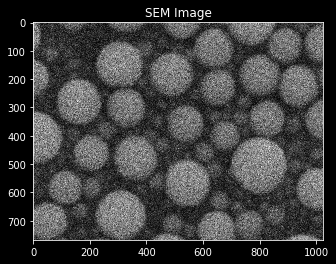

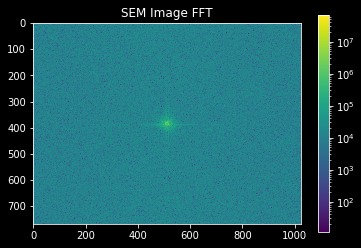

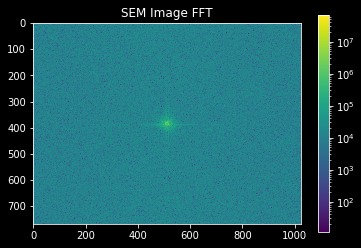

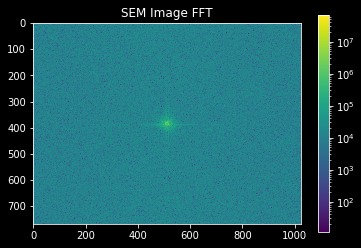

In [14]:
main()